In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
#from sklearn.externals import joblib
import joblib
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [13]:
#Load Image data set first
path = "C:/Users/user/Desktop/PythonProject/lds/FullCollection/"
dpurpose = ["train/","validate/","test/"]
#img = image.load_img(path+dpurpose[0]+"healthy/0003_0002.JPG")
#plt.imshow(img)

#cv2.imread(path).shape read the data size in (heigh,width,colorsize).. eg.(4000, 6000, 3)
#cv2.imread(path+dpurpose[0]+"healthy/0003_0002.JPG").shape

In [15]:
#Prep and define Img dataset for training and validating
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

#train & validation is now ImageDataGenerator type
train_dataset = train.flow_from_directory(path+dpurpose[0], #file's directory
                                          target_size = (200,200),  #Shrink size
                                          batch_size = 64,  #numbers of image to be yield from each batch
                                          class_mode = 'binary') 
                                            #In this scenario, only two labels which is diseased & healthy
                                            #since it is a classification problem, classmode=binary(0/1)
validation_dataset = validation.flow_from_directory(path+dpurpose[1],
                                                    target_size = (200,200),
                                                    batch_size = 64,
                                                    class_mode = 'binary')
#to see the classes found in the folder
print(train_dataset.class_indices)
train_dataset.classes
len(train_dataset)

Found 4342 images belonging to 2 classes.
Found 160 images belonging to 2 classes.
{'Diseased': 0, 'Healthy': 1}


136

### Apply CNN(convolution nueral network) with max pooling

In [17]:
#Define our model
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    ###layer.dense change to sofmax if there is multiple class
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
                                    ])


### Compile the model and start training

In [1]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])

model_fit = model.fit(train_dataset,
                      steps_per_epoch = 20,
                      epochs = 20,
                      validation_data = validation_dataset)

NameError: name 'model' is not defined

### Define function for model testing with model passed as parameter 

Testing on data in folder: test2/


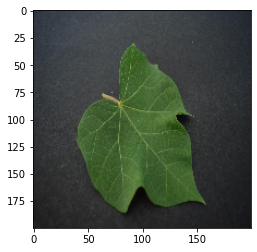

ImageName:0006_0001.JPG is a Healthy Leaf


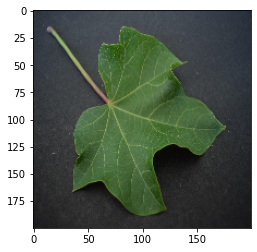

ImageName:0006_0002.JPG is a Healthy Leaf


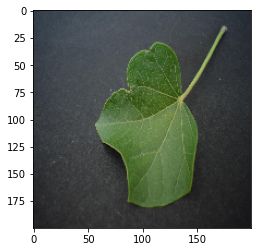

ImageName:0006_0003.JPG is a Healthy Leaf


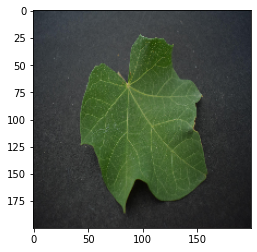

ImageName:0006_0004.JPG is a Healthy Leaf


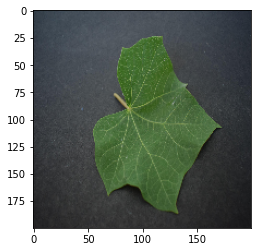

ImageName:0006_0005.JPG is a Healthy Leaf


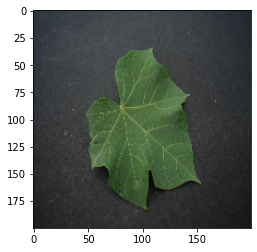

ImageName:0006_0006.JPG is a Healthy Leaf


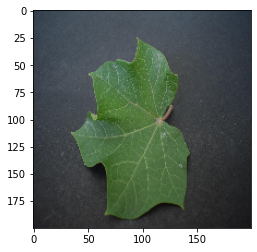

ImageName:0006_0007.JPG is a Healthy Leaf


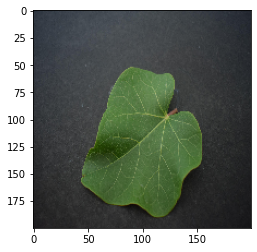

ImageName:0006_0008.JPG is a Healthy Leaf


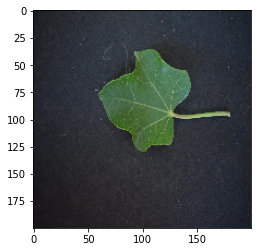

ImageName:0006_0009.JPG is a Healthy Leaf


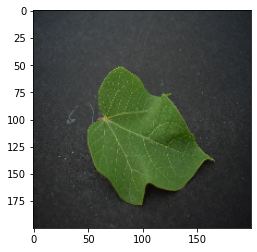

ImageName:0006_0010.JPG is a Healthy Leaf


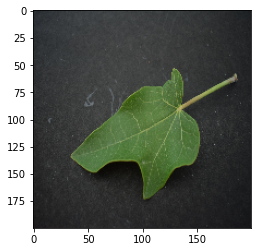

ImageName:0006_0011.JPG is a Healthy Leaf


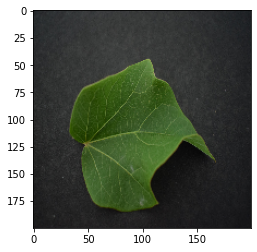

ImageName:0006_0012.JPG is a Healthy Leaf


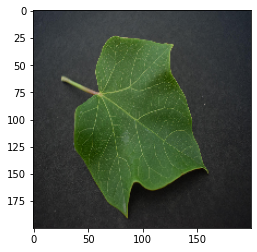

ImageName:0006_0013.JPG is a Healthy Leaf


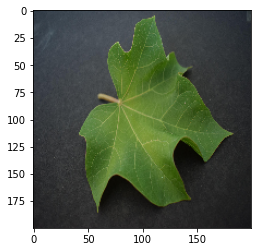

ImageName:0006_0014.JPG is a Healthy Leaf


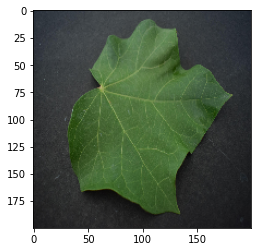

ImageName:0006_0015.JPG is a Healthy Leaf


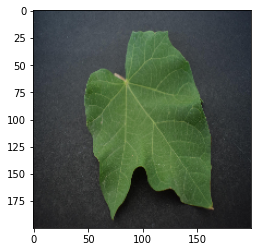

ImageName:0006_0016.JPG is a Healthy Leaf


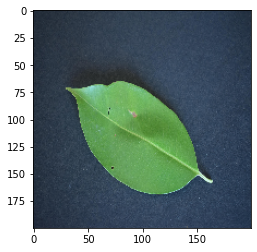

ImageName:0017_0001.JPG is a Diseased Leaf


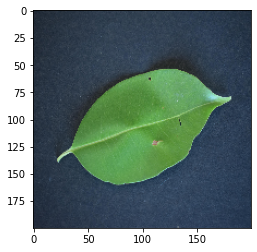

ImageName:0017_0002.JPG is a Diseased Leaf


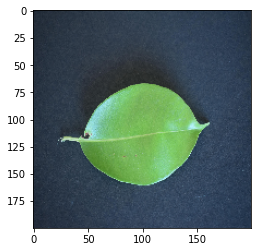

ImageName:0017_0003.JPG is a Diseased Leaf


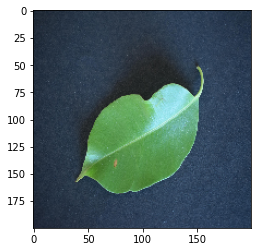

ImageName:0017_0004.JPG is a Diseased Leaf


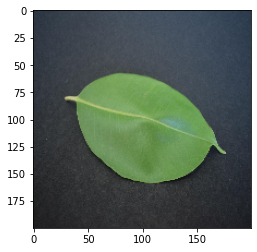

ImageName:0017_0005.JPG is a Diseased Leaf


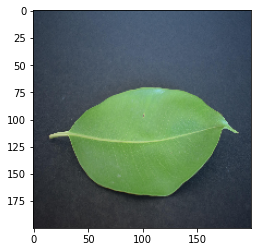

ImageName:0017_0006.JPG is a Diseased Leaf


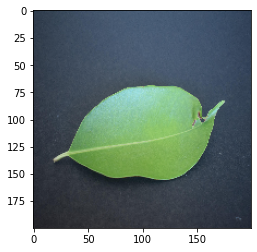

ImageName:0017_0007.JPG is a Diseased Leaf


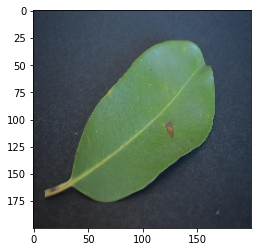

ImageName:0017_0008.JPG is a Diseased Leaf


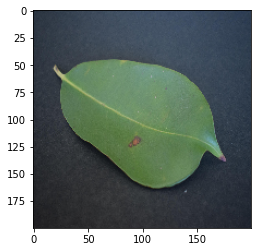

ImageName:0017_0009.JPG is a Diseased Leaf


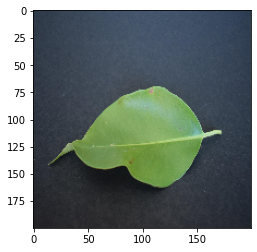

ImageName:0017_0010.JPG is a Diseased Leaf


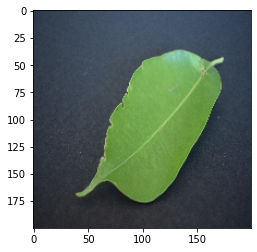

ImageName:0017_0011.JPG is a Diseased Leaf


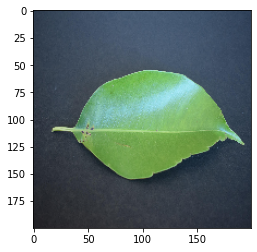

ImageName:0017_0012.JPG is a Diseased Leaf


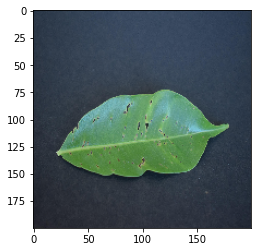

ImageName:0017_0013.JPG is a Diseased Leaf


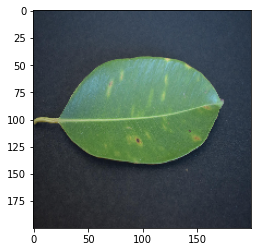

ImageName:0017_0014.JPG is a Diseased Leaf


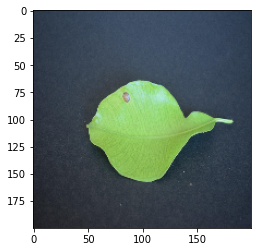

ImageName:0017_0015.JPG is a Diseased Leaf


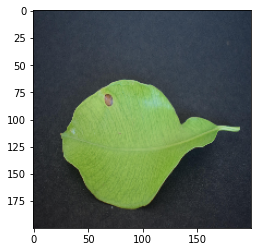

ImageName:0017_0016.JPG is a Diseased Leaf
Total healthy leaf = 16
Total diseased leaf = 16


In [32]:
#The prediction function for model testing(newly created/ loaded from previos model)
def PredictResult(mName):
    model = mName
    dpurpose[2] = "test3/"
    if dpurpose[2] == "test2/":
        dpurpose[2] = "test/"
    elif dpurpose[2] == "test3/":
        dpurpose[2] = "test2/"
    else:
        dpurpose[2] = "test3/"
    #print(dpurpose[2])    
    test_path = path+dpurpose[2]
    count = {"h":0,"d":0}

    print("Testing on data in folder: "+dpurpose[2])
    #load image for testing and generate analyzed results
    for i in os.listdir(test_path):
        img = image.load_img(test_path+'/'+i, target_size=(200,200))
        plt.imshow(img)
        plt.show()

        #convert image files to array datatype
        X = image.img_to_array(img)
        X = np.expand_dims(X,axis = 0)
        images = np.vstack([X])
        
        #Prediction step with result returned(0 == diseased, 1 == healthy)
        predictions = model.predict(images)

        if predictions == 0:
            count["d"]+=1
            print("ImageName:"+i+" is a Diseased Leaf")
        else:
            count["h"]+=1
            print("ImageName:"+i+" is a Healthy Leaf")
    #####################################################################        
    print ("Total healthy leaf = "+str(count["h"]))
    print ("Total diseased leaf = "+str(count["d"]))

PredictResult(model)

### 7/14/2021
## Problem(detection failure): 
###    1) different background picture 
###    2) More than one healthy leaf in a picture(detected as diseased)

In [11]:
#save the model file
#Create a directory for saving model
!mkdir saved_model
#Save the model in the folder created on top as "my_model"
model.save('saved_model/my_model2')

INFO:tensorflow:Assets written to: saved_model/my_model\assets


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

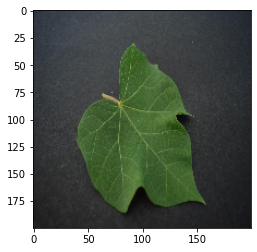

ImageName:0006_0001.JPG is a Healthy Leaf


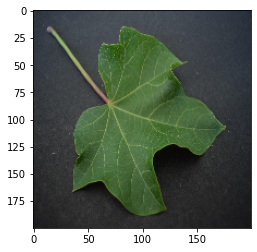

ImageName:0006_0002.JPG is a Diseased Leaf


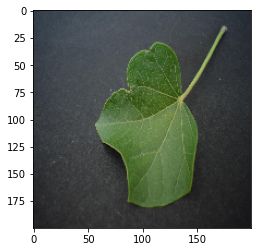

ImageName:0006_0003.JPG is a Healthy Leaf


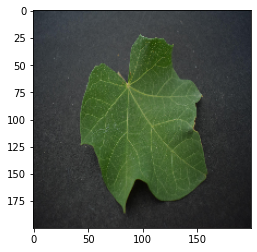

ImageName:0006_0004.JPG is a Healthy Leaf


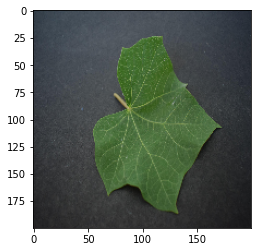

ImageName:0006_0005.JPG is a Healthy Leaf


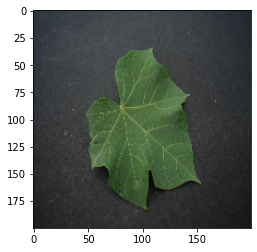

ImageName:0006_0006.JPG is a Healthy Leaf


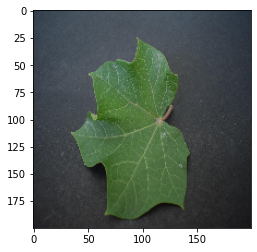

ImageName:0006_0007.JPG is a Healthy Leaf


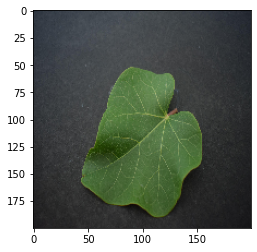

ImageName:0006_0008.JPG is a Healthy Leaf


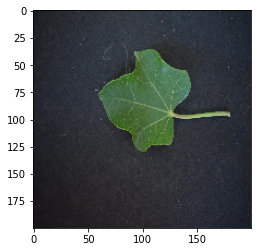

ImageName:0006_0009.JPG is a Healthy Leaf


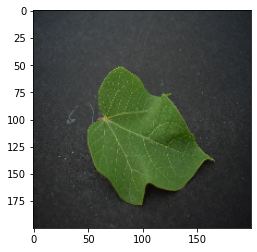

ImageName:0006_0010.JPG is a Healthy Leaf


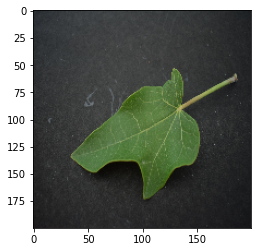

ImageName:0006_0011.JPG is a Healthy Leaf


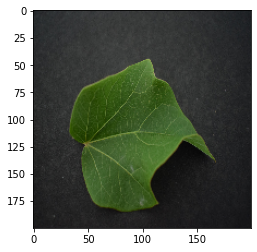

ImageName:0006_0012.JPG is a Healthy Leaf


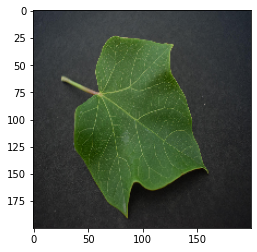

ImageName:0006_0013.JPG is a Healthy Leaf


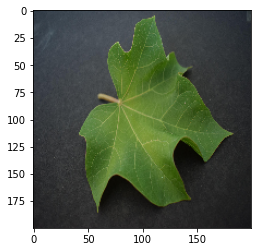

ImageName:0006_0014.JPG is a Healthy Leaf


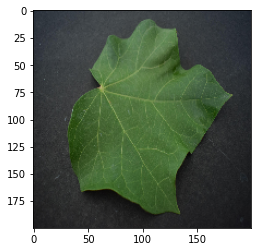

ImageName:0006_0015.JPG is a Healthy Leaf


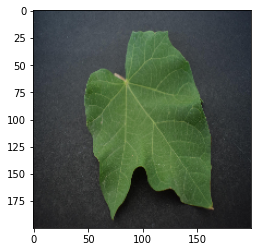

ImageName:0006_0016.JPG is a Healthy Leaf


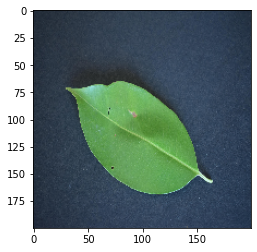

ImageName:0017_0001.JPG is a Diseased Leaf


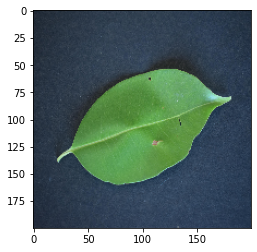

ImageName:0017_0002.JPG is a Diseased Leaf


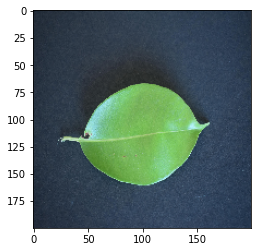

ImageName:0017_0003.JPG is a Diseased Leaf


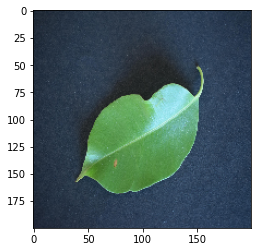

ImageName:0017_0004.JPG is a Diseased Leaf


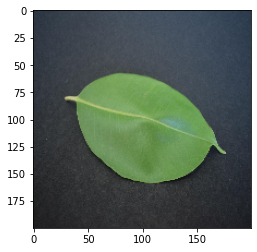

ImageName:0017_0005.JPG is a Diseased Leaf


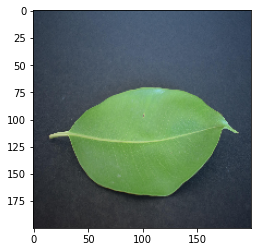

ImageName:0017_0006.JPG is a Diseased Leaf


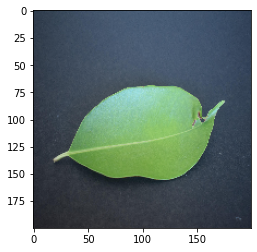

ImageName:0017_0007.JPG is a Diseased Leaf


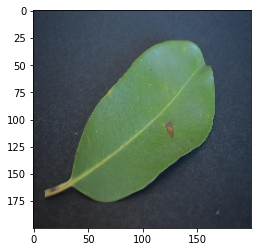

ImageName:0017_0008.JPG is a Diseased Leaf


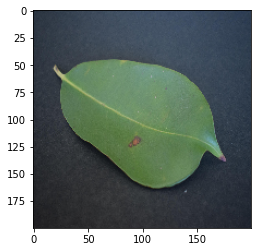

ImageName:0017_0009.JPG is a Diseased Leaf


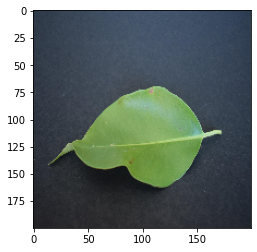

ImageName:0017_0010.JPG is a Diseased Leaf


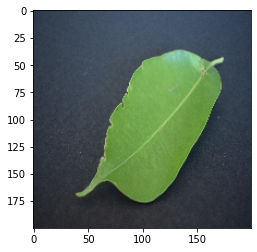

ImageName:0017_0011.JPG is a Diseased Leaf


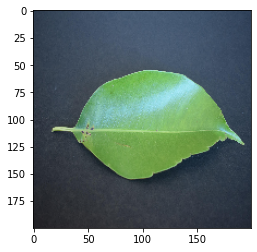

ImageName:0017_0012.JPG is a Diseased Leaf


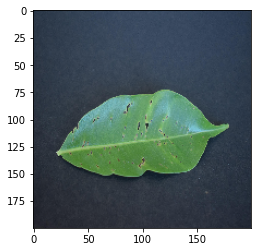

ImageName:0017_0013.JPG is a Diseased Leaf


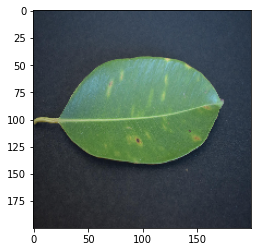

ImageName:0017_0014.JPG is a Diseased Leaf


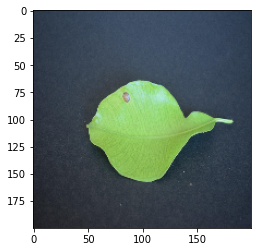

ImageName:0017_0015.JPG is a Diseased Leaf


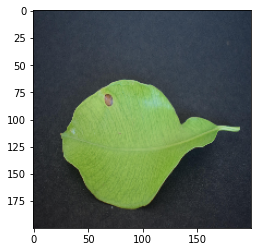

ImageName:0017_0016.JPG is a Diseased Leaf
Total healthy leaf = 15
Total diseased leaf = 17


In [7]:
new_model = tf.keras.models.load_model('saved_model/my_model2')
#new_model.summary()

#PredictResult(new_model)